<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/cluster_merit_6e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [5]:
import warnings

warnings.filterwarnings('ignore')

input

In [6]:
df = pd.read_csv("EPS coded data_merit2.csv")

exploratory

In [7]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OP1                         3329 non-null   int64  
 1   OP2                         3329 non-null   int64  
 2   OP3                         3329 non-null   int64  
 3   OP4                         3329 non-null   int64  
 4   OP5                         3329 non-null   int64  
 5   OP6                         3329 non-null   int64  
 6   OP7                         3329 non-null   int64  
 7   Desired Pay Mix (less LTI)  3329 non-null   float64
 8   Desired Pay Mix             3329 non-null   float64
 9   Base Pay Diff               3329 non-null   float64
 10  Bonus Pay Diff              3329 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 286.2 KB


In [8]:
df.head()

,OP1,OP2,OP3,OP4,OP5,OP6,OP7,Desired Pay Mix (less LTI),Desired Pay Mix,Base Pay Diff,Bonus Pay Diff
0,0,0,0,0,1,0,0,0.125000,0.3,1.3,1.5
1,0,0,1,0,0,0,0,0.250000,0.4,1.5,1.5
2,0,1,0,0,0,0,0,0.300000,0.3,1.3,1.3
3,0,1,0,0,0,0,0,0.222222,0.3,1.3,1.3
4,0,0,0,0,1,0,0,0.125000,0.3,1.5,1.5


checks

In [9]:
df.isnull().sum()
df.describe()

,OP1,OP2,OP3,OP4,OP5,OP6,OP7,Desired Pay Mix (less LTI),Desired Pay Mix,Base Pay Diff,Bonus Pay Diff
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000
mean,0.089817,0.284169,0.342145,0.021628,0.179634,0.042355,0.040252,0.268987,0.347570,1.695374,1.717062
std,0.285962,0.451086,0.474499,0.145488,0.383940,0.201428,0.196580,0.093571,0.089225,0.269152,0.276911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,1.300000,1.300000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.300000,1.500000,1.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263158,0.300000,1.700000,1.700000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.400000,1.900000,1.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.100000,2.100000


In [10]:
X=df

Scaling

In [11]:
cols = X.columns

In [12]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [13]:
X = pd.DataFrame(X, columns=[cols])

In [14]:
X.head()

,OP1,OP2,OP3,OP4,OP5,OP6,OP7,Desired Pay Mix (less LTI),Desired Pay Mix,Base Pay Diff,Bonus Pay Diff
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.000000,0.00,0.25
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.250000,0.142857,0.25,0.25
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.00,0.00
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.000000,0.00,0.00
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.000000,0.25,0.25


In [15]:
X.dropna(inplace=True)
X

,OP1,OP2,OP3,OP4,OP5,OP6,OP7,Desired Pay Mix (less LTI),Desired Pay Mix,Base Pay Diff,Bonus Pay Diff
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.000000,0.00,0.25
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.250000,0.142857,0.25,0.25
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.00,0.00
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.000000,0.00,0.00
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125000,0.000000,0.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...
3324,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.176471,0.000000,1.00,0.50
3325,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.000000,0.75,0.75
3326,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000,0.75,0.75
3327,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.222222,0.000000,0.75,1.00


K means

In [16]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [17]:
kmeans.cluster_centers_

array([[1.36529680e-01, 4.31963470e-01, 4.32986980e-15, 3.28767123e-02,
        2.73059361e-01, 6.43835616e-02, 6.11872146e-02, 2.68831373e-01,
        5.91780822e-02, 5.04223744e-01, 5.29337900e-01],
       [1.15185639e-15, 2.99760217e-15, 1.00000000e+00, 1.97758476e-16,
        2.30371278e-15, 3.53883589e-16, 1.11022302e-16, 2.69285219e-01,
        8.48363226e-02, 4.74978051e-01, 5.05926251e-01]])

inertia

In [18]:
kmeans.inertia_

2414.707501003788

Elbow

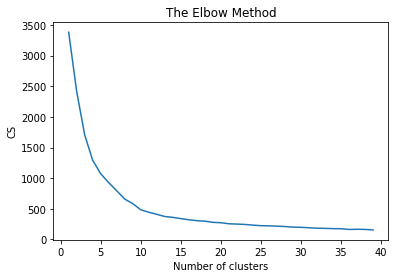

In [19]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

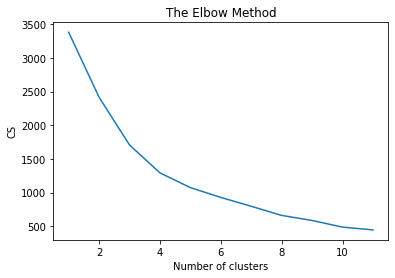

In [20]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [22]:
labels=kmeans.labels_
print(labels)

[2 1 0 ... 0 2 0]


In [23]:
Z=kmeans.cluster_centers_
Z

array([[ 7.07767178e-16,  1.00000000e+00,  2.77555756e-15,
         1.70002901e-16,  1.41553436e-15,  3.40005801e-16,
        -8.32667268e-17,  2.73567167e-01,  4.11507098e-02,
         5.07135307e-01,  5.40169133e-01],
       [-1.52655666e-16, -7.21644966e-16,  1.00000000e+00,
         6.93889390e-18, -3.05311332e-16,  2.49800181e-16,
        -1.38777878e-17,  2.75288294e-01,  9.19281145e-02,
         1.81236674e-01,  1.96162047e-01],
       [-1.52655666e-16,  6.10622664e-16,  1.27675648e-15,
         7.63278329e-17,  1.00000000e+00,  2.91433544e-16,
        -1.59594560e-16,  2.54583718e-01,  4.38843765e-02,
         5.47658863e-01,  5.66471572e-01],
       [ 1.00000000e+00, -7.77156117e-16, -1.11022302e-15,
        -7.63278329e-17, -2.77555756e-16,  1.52655666e-16,
         9.71445147e-17,  2.76311480e-01,  9.55566173e-02,
         4.45652174e-01,  4.37290970e-01],
       [-1.52655666e-16,  1.16573418e-15,  1.00000000e+00,
         1.04083409e-16, -3.05311332e-16,  3.05311332e-16,
  

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3329 samples in 0.010s...
[t-SNE] Computed neighbors for 3329 samples in 0.373s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3329
[t-SNE] Computed conditional probabilities for sample 2000 / 3329
[t-SNE] Computed conditional probabilities for sample 3000 / 3329
[t-SNE] Computed conditional probabilities for sample 3329 / 3329
[t-SNE] Mean sigma: 0.124658
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.439636
[t-SNE] KL divergence after 3700 iterations: 0.140539


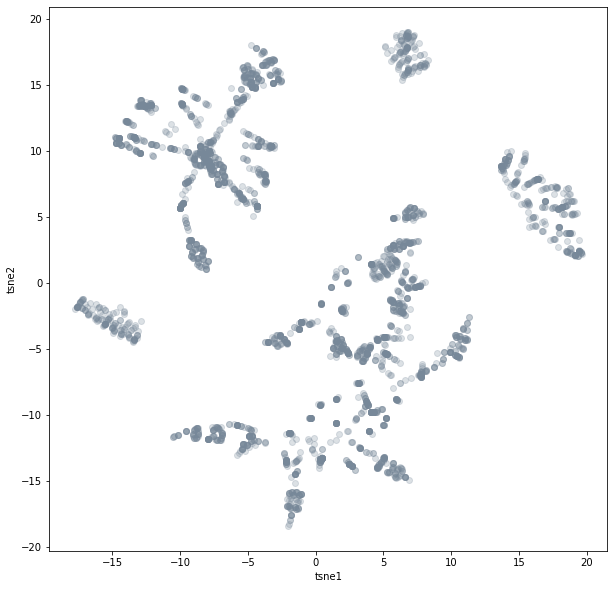

In [24]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [25]:
import matplotlib

In [26]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3329 samples in 0.005s...
[t-SNE] Computed neighbors for 3329 samples in 0.359s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3329
[t-SNE] Computed conditional probabilities for sample 2000 / 3329
[t-SNE] Computed conditional probabilities for sample 3000 / 3329
[t-SNE] Computed conditional probabilities for sample 3329 / 3329
[t-SNE] Mean sigma: 0.124658
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.787659
[t-SNE] KL divergence after 2500 iterations: 0.185089


In [27]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=int32)

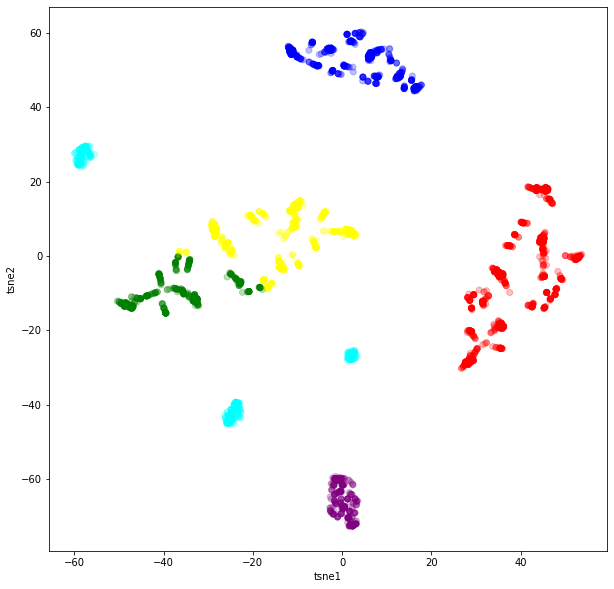

In [28]:
colors = ["red","green","blue","purple","yellow","cyan"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [29]:
Z2 = ms.inverse_transform(Z)
Z2

array([[ 7.07767178e-16,  1.00000000e+00,  2.77555756e-15,
         1.70002901e-16,  1.41553436e-15,  3.40005801e-16,
        -8.32667268e-17,  2.73567167e-01,  3.28805497e-01,
         1.70570825e+00,  1.73213531e+00],
       [-1.52655666e-16, -7.21644966e-16,  1.00000000e+00,
         6.93889390e-18, -3.05311332e-16,  2.49800181e-16,
        -1.38777878e-17,  2.75288294e-01,  3.64349680e-01,
         1.44498934e+00,  1.45692964e+00],
       [-1.52655666e-16,  6.10622664e-16,  1.27675648e-15,
         7.63278329e-17,  1.00000000e+00,  2.91433544e-16,
        -1.59594560e-16,  2.54583718e-01,  3.30719064e-01,
         1.73812709e+00,  1.75317726e+00],
       [ 1.00000000e+00, -7.77156117e-16, -1.11022302e-15,
        -7.63278329e-17, -2.77555756e-16,  1.52655666e-16,
         9.71445147e-17,  2.76311480e-01,  3.66889632e-01,
         1.65652174e+00,  1.64983278e+00],
       [-1.52655666e-16,  1.16573418e-15,  1.00000000e+00,
         1.04083409e-16, -3.05311332e-16,  3.05311332e-16,
  